In [4]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

**Detect all coins using Contours**

In [6]:
image_path = "input/coin_.png" 
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#blurring the image and using canny edge detection
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edges = cv2.Canny(blurred, 50, 150)

#usinf dilate to make edges thicker 
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=2)

#identifying the contours
contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image, contours, -1, (0,255,0), 2)

cv2.imwrite("output/contours_coin.png", image)

# cv2.imshow('Image', rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

**Counting the number of coins**

In [9]:
#Counting number of coing 
no_coins= len(contours)
print ("The number of coins: ", str(no_coins))

The number of coins:  14


**Segmentation of each coin**

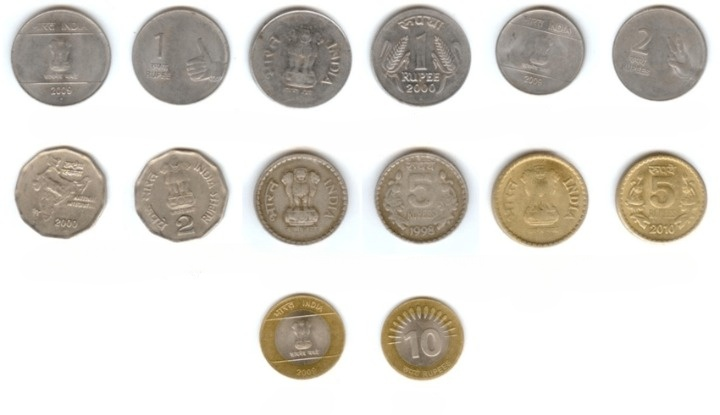

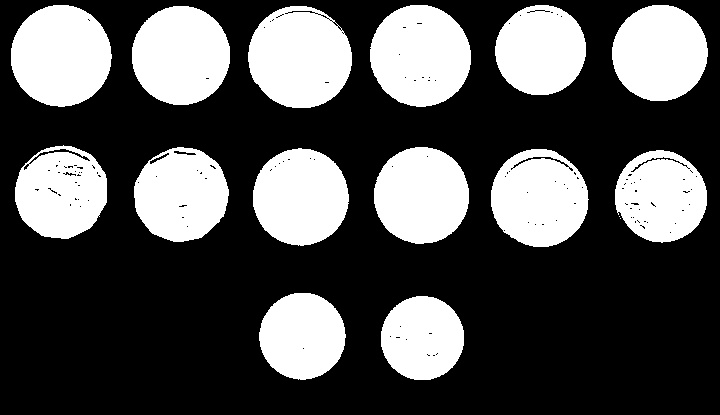

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


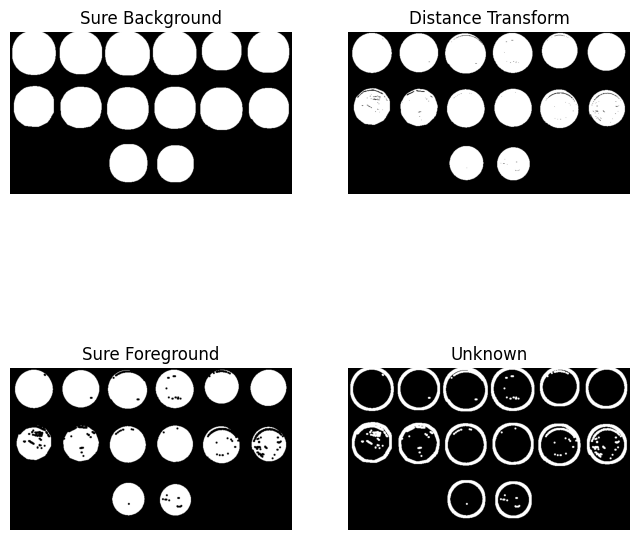

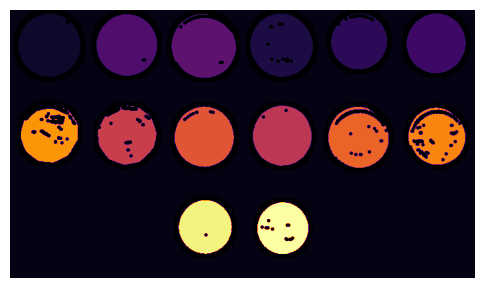

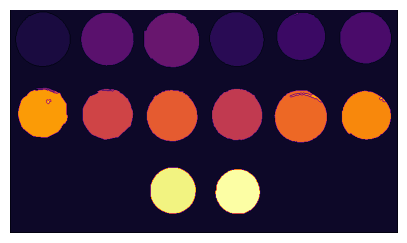

In [7]:
img = cv2.imread("input/coin_.png")
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
imshow(img)
#converting into grayscale and then binary form
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(gray,0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

#removing noise
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel, iterations = 2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=5)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.05* dist.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

#unkown area
unknown = cv2.subtract(sure_bg,sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()

# Marker labelling for foreground
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="inferno")
ax.axis('off')
plt.show()

# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="inferno")
ax.axis('off')
plt.savefig("output/watershed_output.png", bbox_inches='tight', dpi=300)
plt.show()

